#TMNIST (Typeface MNIST)

# **Read DataSet**

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Samanth/TMNIST_Data.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(29900, 786)

In [ ]:
data.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(data['names'].unique())

['GrandHotel-Regular' 'EncodeSansCondensed-Medium' 'Varela-Regular' ...
 'CourierPrime-Italic' 'Bentham-Regular' 'AveriaSerifLibre-Ligh']


In [ ]:
data['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

# Seperate Data to X and Y

In [ ]:
X = data.drop(columns={'names','labels'})
y = data[['labels']]

#Viewing Sample Data

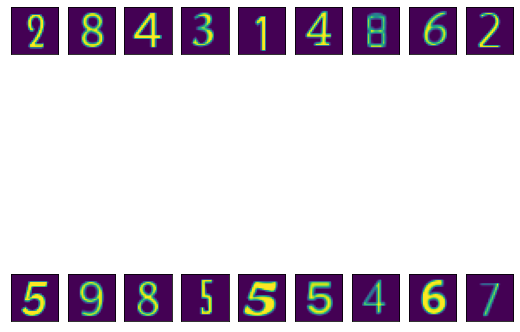

In [ ]:
import matplotlib.pyplot as plt

X_images = X.values.reshape(-1,28,28)
fig,axs = plt.subplots(2,9,figsize=(9,9))
for i in range(18):
    r=i//9
    c=i%9
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()

# Seperating Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
# creating training set using 80% of data and test set using 20% of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

print("X_train shape : {}".format(X_train.shape))

print("X_test shape : {}".format(X_test.shape))



X_train shape : (23920, 28, 28)
X_test shape : (5980, 28, 28)


In [ ]:
data['labels'].unique()

array([2, 8, 4, 3, 1, 6, 5, 9, 7, 0])

In [ ]:
data['labels'].nunique()

10

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

Transforming targets for better prediction

In [ ]:
y_train_enc,y_test_enc = prepare_targets(y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train.shape, X_test.shape

((23920, 28, 28), (5980, 28, 28))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_final = to_categorical(y_train_enc,10,dtype = 'int')
y_test_final = to_categorical(y_test_enc,10,dtype = 'int')

In [ ]:
y_train_final.shape, y_test_final.shape

((23920, 10), (5980, 10))

#Configuring input features for CNN.

In [ ]:
X_train = X_train.reshape(23920, 28, 28,1)
X_test = X_test.reshape(5980, 28, 28,1)

In [ ]:
X_train.shape, X_test.shape

((23920, 28, 28, 1), (5980, 28, 28, 1))

# Normalizing the Dataset for the Neural Network

In [ ]:
X_train, X_test = X_train/255, X_test/255

# Building Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
cnn = Sequential ()


cnn.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same',input_shape=X_train.shape[1:]))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(350))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

cnn.add(Dense(y_train.nunique()[0], activation = 'softmax'))

In [ ]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 256)       2560      
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 28, 28, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 256)       0         
                                                                 
 flatten_6 (Flatten)         (None, 50176)            

The Convolution model, passes the input matrix (28, 28, 1) through one convolution,dropout,flatten and pooling and outputs a matrix of (14, 14, 256), and then directly flattens the data, The output dimension of the last   layer is 10, which is 0 to 9 .  Softmax activation function was used in order obtain most probable output for a given input, and for activation Relu was used in every individual layer.

The default MaxPooling kernel has a shape of (2, 2) and strides of (2, 2). Applying that to a (28, 28) image results in an image of shape (((28 - 2)//2) + 1, ((28 - 2)//2) + 1)) = (14, 14).

This pattern can be extended to all Conv2D and MaxPooling layers.

The Flatten layer takes all pixels along all channels and creates a 1D vector (not considering batch size). Therefore, an input of (14, 14, 256) is flattened to (14 * 14 * 256) = 50176 values.

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Configure the model and start training

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = cnn.fit(X_train, y_train_final, epochs=20, batch_size=10,callbacks=[callback], verbose=1, validation_split=0.15)

Epoch 1/20
2034/2034 [==============================] - 407s 200ms/step - loss: 0.1689 - accuracy: 0.9493 - val_loss: 0.0868 - val_accuracy: 0.9749
Epoch 2/20
2034/2034 [==============================] - 404s 198ms/step - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.0573 - val_accuracy: 0.9830
Epoch 3/20
2034/2034 [==============================] - 401s 197ms/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.0644 - val_accuracy: 0.9810
Epoch 4/20
2034/2034 [==============================] - 398s 196ms/step - loss: 0.0508 - accuracy: 0.9836 - val_loss: 0.0613 - val_accuracy: 0.9833
Epoch 5/20
2034/2034 [==============================] - 396s 195ms/step - loss: 0.0476 - accuracy: 0.9841 - val_loss: 0.0630 - val_accuracy: 0.9849


# Model Test after train

In [ ]:
test_results = cnn.evaluate(X_test, y_test_final, verbose=1)
print(f'Testing set results - Accuracy: {test_results[1]}%')

187/187 [==============================] - 12s 66ms/step - loss: 0.0414 - accuracy: 0.9881
Testing set results - Accuracy: 0.9881271123886108%


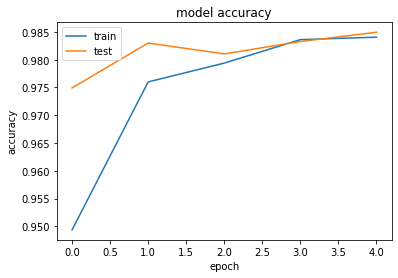

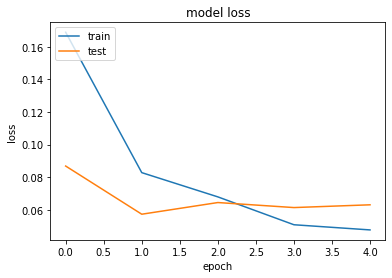

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Conclusion

After 5 rounds, The training accuracy has reached 98.41 and testing has reached 98.81